
# Capstone Project - Life insurance Sales

The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high-performing agents and upskill programs for low-performing agents.

# Business Problem overview
The challenge at hand involves leveraging a dataset from a prominent life insurance company with the objective of forecasting bonus amounts for its agents. This prediction task serves a dual purpose: firstly, to identify high-performing agents who deserve targeted engagement activities and incentives to sustain their excellent performance, and secondly, to pinpoint underperforming agents who would benefit from skill-enhancement programs and additional support. Essentially, the company aims to harness the power of data-driven insights to reward and motivate its top talent while simultaneously nurturing the development of agents who require improvement. By doing so, the company not only seeks to optimize its resource allocation but also aims to foster a more dynamic and productive agent workforce, ultimately enhancing its competitiveness and customer service quality in the life insur28nce sector.


## Project Prepared by: Atishay Jain

# Import all necessary libaries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import sklearn.metrics as metrics
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set(style="whitegrid")

## MODULE 1: EDA, Data Cleansing, Outliers Treatment, Data overview

# Data Overview

In [2]:
Data_Dictionary = pd.read_excel("Sales.xlsx",sheet_name='Data Dict') #import data set
Data_Dictionary

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Sales,CustID,Unique customer ID
2,NaN,Sales,AgentBonus,Bonus amount given to each agents in last month
3,NaN,Sales,Age,Age of customer
4,NaN,Sales,CustTenure,Tenure of customer in organization
5,NaN,Sales,Channel,Channel through which acquisition of customer ...
6,NaN,Sales,Occupation,Occupation of customer
7,NaN,Sales,EducationField,Field of education of customer
8,NaN,Sales,Gender,Gender of customer
9,NaN,Sales,ExistingProdType,Existing product type of customer


In [3]:
sale = pd.read_excel("Sales.xlsx",sheet_name='Sales') #import data set

In [4]:
sale.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [5]:
sale.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [6]:
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [8]:
sale.shape #checking shape of data

(4520, 20)

In [9]:
## checking duplicate data and removing the duplicates
sale.duplicated().count()

4520

In [7]:
sale.isnull().sum() #checking null values

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [8]:
#Set target variable

target_variable = 'AgentBonus'

## Data cleansing

### Null/Missing value treatment

In [9]:
#Fill missing values in the numerical column with the mean
numerical_cols = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'CustCareScore']

for col in numerical_cols:
    sale[col].fillna(sale[col].mean(), inplace=True)

In [10]:
sale.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [11]:
#Check all unique calues in non-numeric columns
# Select only non-numeric columns
non_numeric_columns = sale.select_dtypes(exclude='number')

# Loop through each non-numeric column and print unique values
for column in non_numeric_columns.columns:
    unique_values = sale[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Channel': ['Agent' 'Third Party Partner' 'Online']
Unique values in 'Occupation': ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
Unique values in 'EducationField': ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
Unique values in 'Gender': ['Female' 'Male' 'Fe male']
Unique values in 'Designation': ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
Unique values in 'MaritalStatus': ['Single' 'Divorced' 'Unmarried' 'Married']
Unique values in 'Zone': ['North' 'West' 'East' 'South']
Unique values in 'PaymentMethod': ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [12]:
##Count
sale.select_dtypes(exclude='number').nunique()

Channel           3
Occupation        5
EducationField    7
Gender            3
Designation       6
MaritalStatus     4
Zone              4
PaymentMethod     4
dtype: int64

In [13]:
# Replace incorrect values in the 'Gender' column
sale['Gender'] = sale['Gender'].replace({'Fe male': 'Female'})

# Replace incorrect values in the 'Occupation' column
sale['Occupation'] = sale['Occupation'].replace({'Laarge Business': 'Large Business','Free Lancer': 'Freelancer'})

# Replace incorrect values in the 'EducationField' column
sale['EducationField'] = sale['EducationField'].replace({'UG': 'Under Graduate','MBA':'Post Graduate','Engineer':'Graduate'})

# Replace incorrect values in the 'Designation' column
sale['Designation'] = sale['Designation'].replace({'Exe': 'Executive'})

In [14]:
#Check all unique calues in non-numeric columns
# Select only non-numeric columns
non_numeric_columns = sale.select_dtypes(exclude='number')

# Loop through each non-numeric column and print unique values
for column in non_numeric_columns.columns:
    unique_values = sale[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Channel': ['Agent' 'Third Party Partner' 'Online']
Unique values in 'Occupation': ['Salaried' 'Freelancer' 'Small Business' 'Large Business']
Unique values in 'EducationField': ['Graduate' 'Post Graduate' 'Under Graduate' 'Diploma']
Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Designation': ['Manager' 'Executive' 'VP' 'AVP' 'Senior Manager']
Unique values in 'MaritalStatus': ['Single' 'Divorced' 'Unmarried' 'Married']
Unique values in 'Zone': ['North' 'West' 'East' 'South']
Unique values in 'PaymentMethod': ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [15]:
unique_values_non_numeric = sale.select_dtypes(exclude='number').nunique()
print(unique_values_non_numeric)

Channel           3
Occupation        4
EducationField    4
Gender            2
Designation       5
MaritalStatus     4
Zone              4
PaymentMethod     4
dtype: int64


## Outliers Treatment

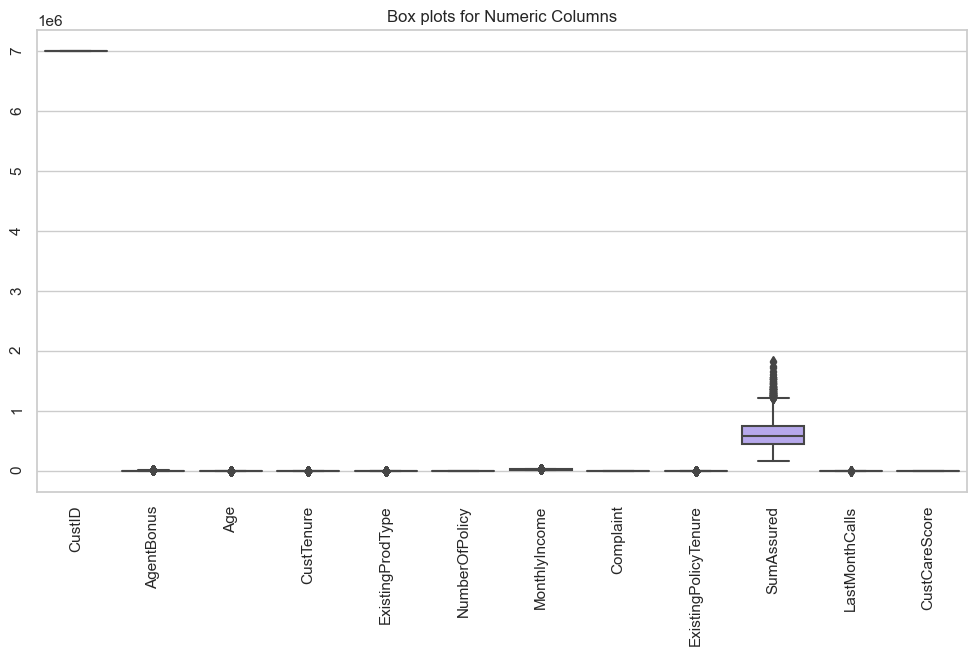

In [16]:
# Check outliers for all numeric columns
numeric_columns = sale.select_dtypes(include=['float64', 'int64']).columns

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=sale[numeric_columns])
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.title(f'Box plots for Numeric Columns')
plt.show()

In [17]:
# Define a threshold for identifying outliers (adjust as needed)
z_score_threshold = 5

# Loop through each numeric column and treat outliers
for column in sale.select_dtypes(include=['number']):
    # Calculate the Z-score for the column
    z_scores = stats.zscore(sale[column])
    
    # Identify outliers based on the Z-score
    outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
    
    # Replace outliers with the median value of the column
    median_value = sale[column].median()
    sale.loc[outliers, column] = median_value

# Now, sale contains the dataset with outliers treated for all numeric columns

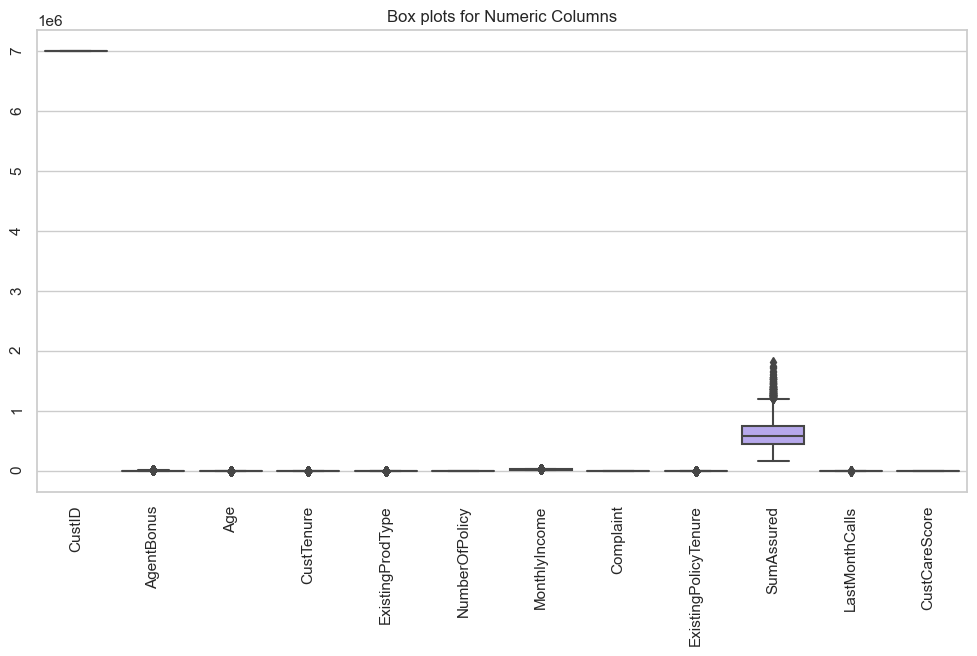

In [18]:
# Check treated outliers for all numeric columns
numeric_columns = sale.select_dtypes(include=['float64', 'int64']).columns

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=sale[numeric_columns])
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.title('Box plots for Numeric Columns')
plt.show()

# Exploratory Data Analysis (EDA)

## 1. Univariate Analysis 

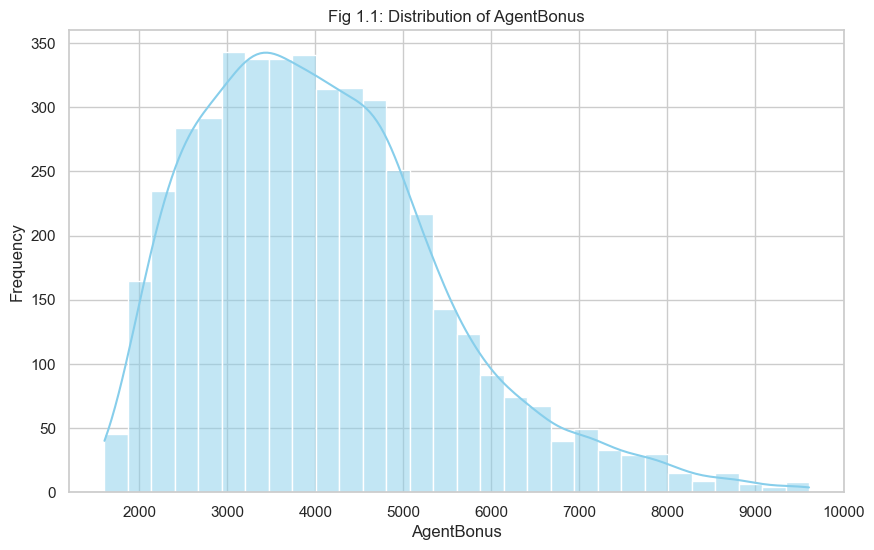

In [19]:
# Distribution Plot (Histogram and Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(sale[target_variable], bins=30, kde=True, color='skyblue')
plt.title(f'Fig 1.1: Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.show()

Interpretation:

The histogram shows the distribution of 'AgentBonus' values, indicating the frequency of different bonus ranges.
The kernel density estimate (KDE) provides a smoothed curve representing the probability density.

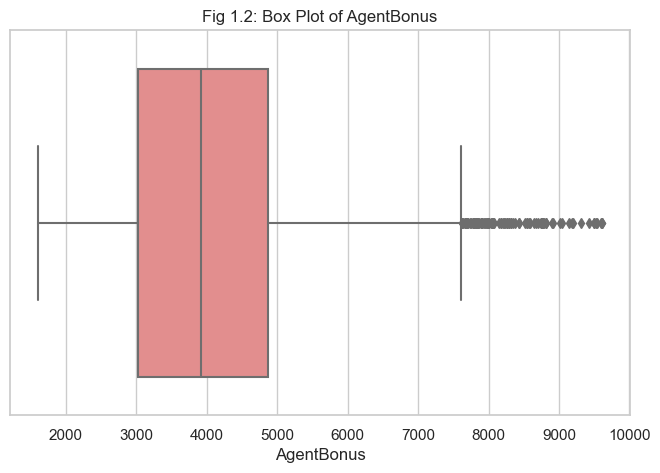

In [20]:
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=sale[target_variable], color='lightcoral')
plt.title(f'Fig 1.2: Box Plot of {target_variable}')
plt.xlabel(target_variable)
plt.show()

Interpretation:

The box plot shows the central tendency and spread of the 'AgentBonus' values.
It highlights the presence of outliers and the overall distribution.

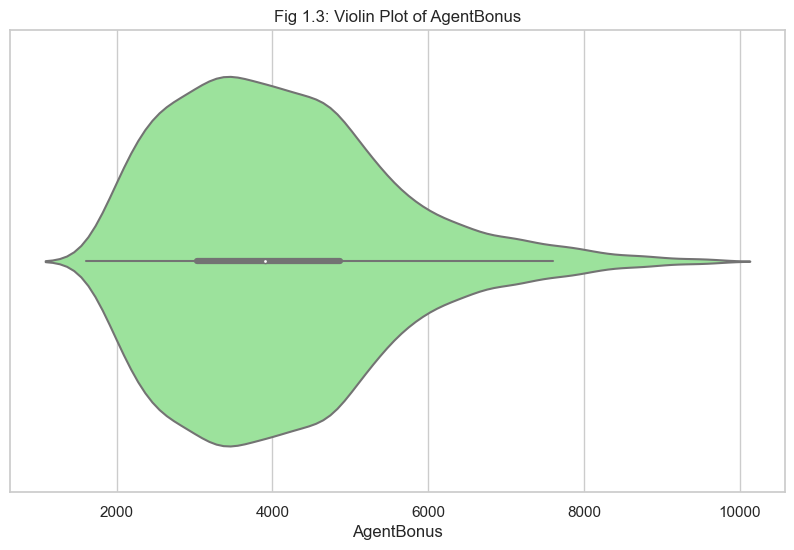

In [21]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=sale[target_variable], color='lightgreen')
plt.title(f'Fig 1.3: Violin Plot of {target_variable}')
plt.xlabel(target_variable)
plt.show()

Interpretation:

The violin plot combines aspects of a box plot and a kernel density plot.
It provides insights into the distribution's shape, spread, and presence of multiple modes.

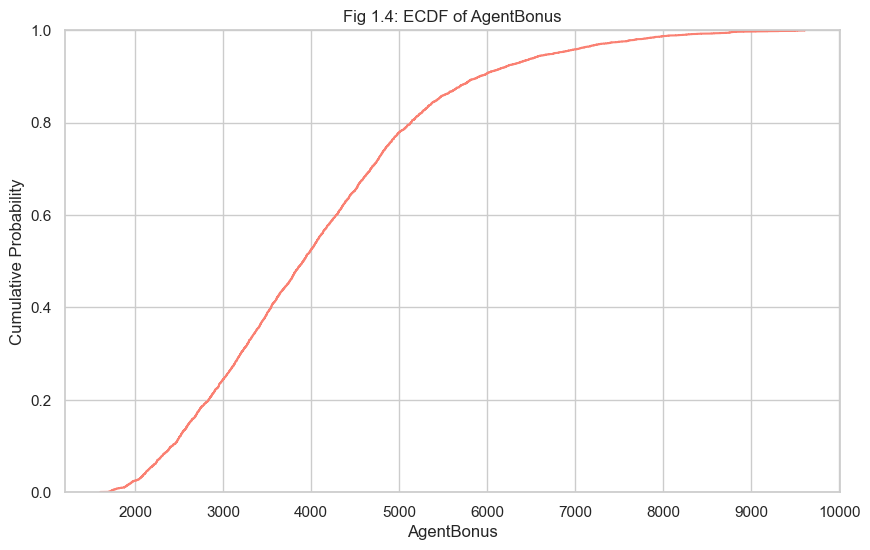

In [22]:
# ECDF (Empirical Cumulative Distribution Function)
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=sale, x=target_variable, color='salmon')
plt.title(f'Fig 1.4: ECDF of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Cumulative Probability')
plt.show()

Interpretation:

The ECDF plot shows the cumulative distribution of 'AgentBonus' values.
It helps understand the percentage of data below a certain bonus amount.

## 2. Bivariate Analysis

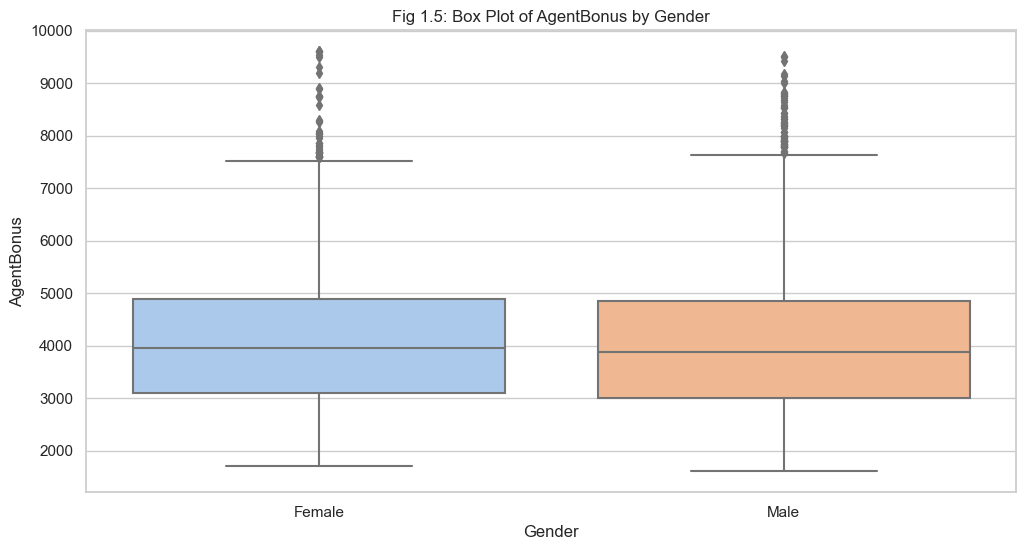

In [23]:
# Bivariate Analysis with Categorical Variables
# Box Plot by Categorical Variable (e.g., 'Gender')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y=target_variable, data=sale, palette='pastel')
plt.title(f'Fig 1.5: Box Plot of {target_variable} by Gender')
plt.xlabel('Gender')
plt.ylabel(target_variable)
plt.show()

Interpretation:

This box plot shows the distribution of 'AgentBonus' for different gender categories.
It helps identify if there are differences in bonus amounts between different genders.

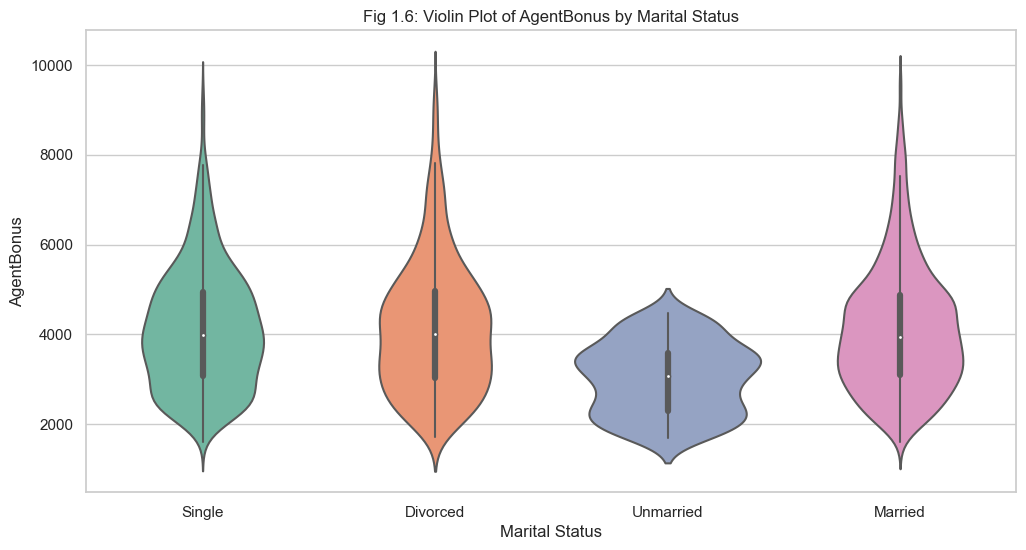

In [24]:
# Violin Plot by Categorical Variable (e.g., 'MaritalStatus')
plt.figure(figsize=(12, 6))
sns.violinplot(x='MaritalStatus', y=target_variable, data=sale, palette='Set2')
plt.title(f'Fig 1.6: Violin Plot of {target_variable} by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel(target_variable)
plt.show()

Interpretation:

This violin plot provides a comparison of 'AgentBonus' distribution for different marital statuses.
It helps visualize the spread and density of bonus amounts across different marital status categories.

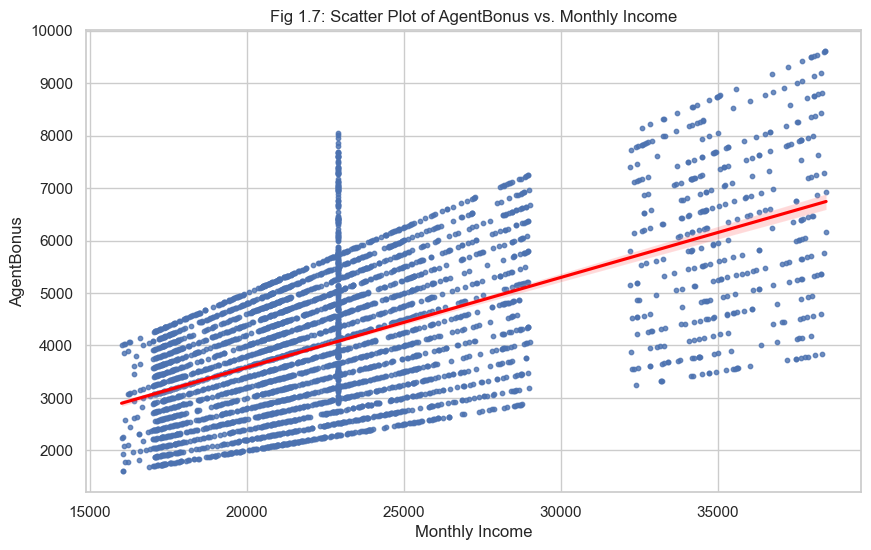

In [25]:
# Bivariate Analysis with Numerical Variables
# Scatter Plot with Regression Line (e.g., 'MonthlyIncome' vs. 'AgentBonus')
plt.figure(figsize=(10, 6))
sns.regplot(x='MonthlyIncome', y=target_variable, data=sale, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Fig 1.7: Scatter Plot of {target_variable} vs. Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel(target_variable)
plt.show()

Interpretation:

This scatter plot with a regression line shows the relationship between 'MonthlyIncome' and 'AgentBonus'.
It helps identify if there is a linear trend or correlation between monthly income and bonus

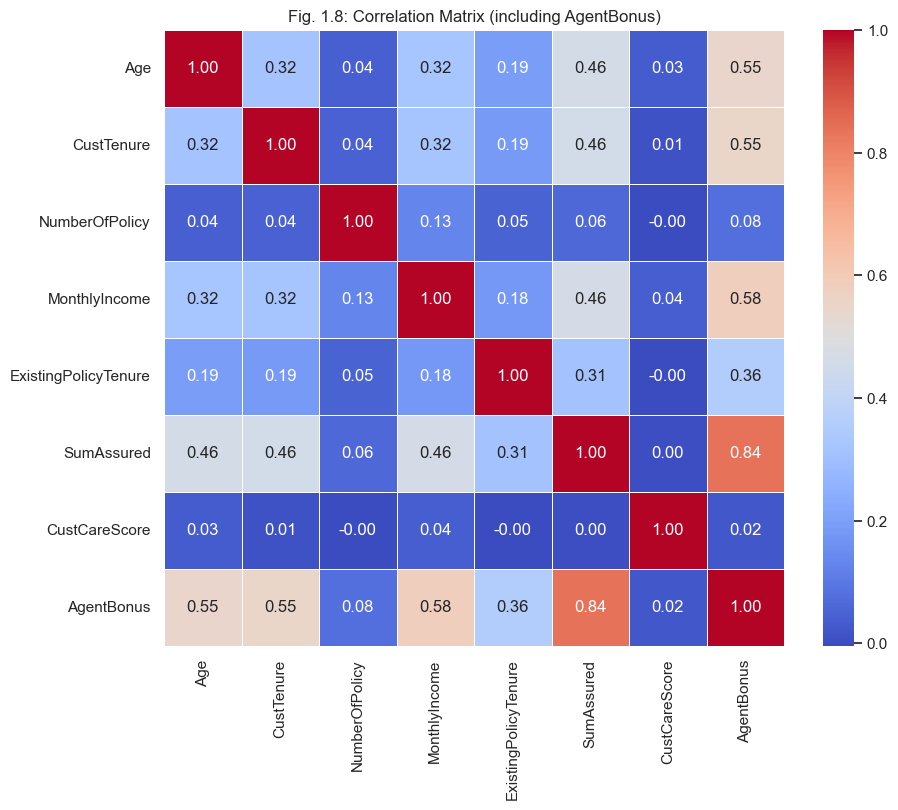

In [26]:
numerical_columns = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'CustCareScore']

# Subset the DataFrame to include only numerical columns
numerical_df = sale[numerical_columns + [target_variable]]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Fig. 1.8: Correlation Matrix (including ' + target_variable + ')')
plt.show()


Interpretation:

The heatmap reveals a positive correlation between 'AgentBonus' and 'MonthlyIncome,' suggesting that higher monthly incomes are associated with larger bonuses.

'Age' and 'CustTenure' exhibit a moderate positive correlation with 'AgentBonus,' indicating potential relationships between agent experience, tenure, and bonus amounts.

'CustCareScore' shows a weak positive correlation, hinting at a slight influence of customer satisfaction on agent bonuses.

No strong correlations were observed with 'NumberOfPolicy,' 'ExistingPolicyTenure,' or 'SumAssured,' suggesting these variables may have limited impact on bonus amounts.

## 3. Multivariate Analysis


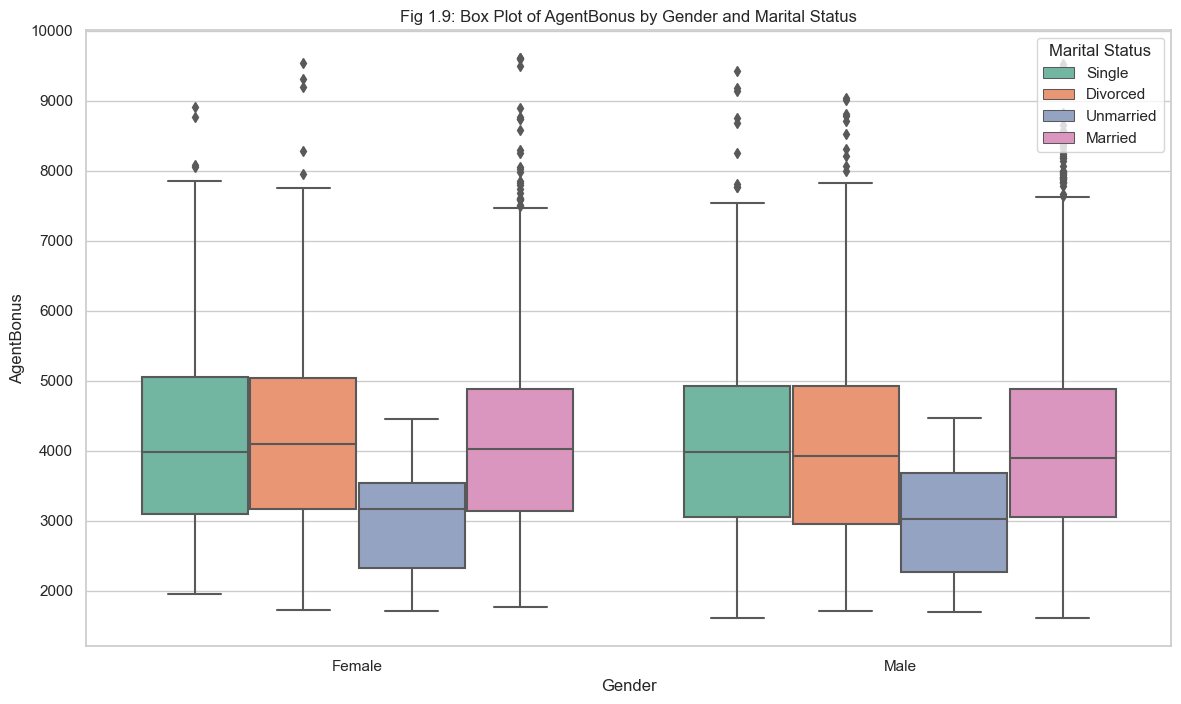

In [27]:
# Multivariate Analysis with Categorical and Numerical Variables
# Box Plot with Hue (e.g., 'Gender' and 'MaritalStatus')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Gender', y=target_variable, hue='MaritalStatus', data=sale, palette='Set2')
plt.title(f'Fig 1.9: Box Plot of {target_variable} by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel(target_variable)
plt.legend(title='Marital Status', loc='upper right')
plt.show()

Interpretation:

This box plot with hue represents the distribution of 'AgentBonus' across different combinations of 'Gender' and 'MaritalStatus'.

It helps identify variations in bonus amounts considering both gender and marital status.

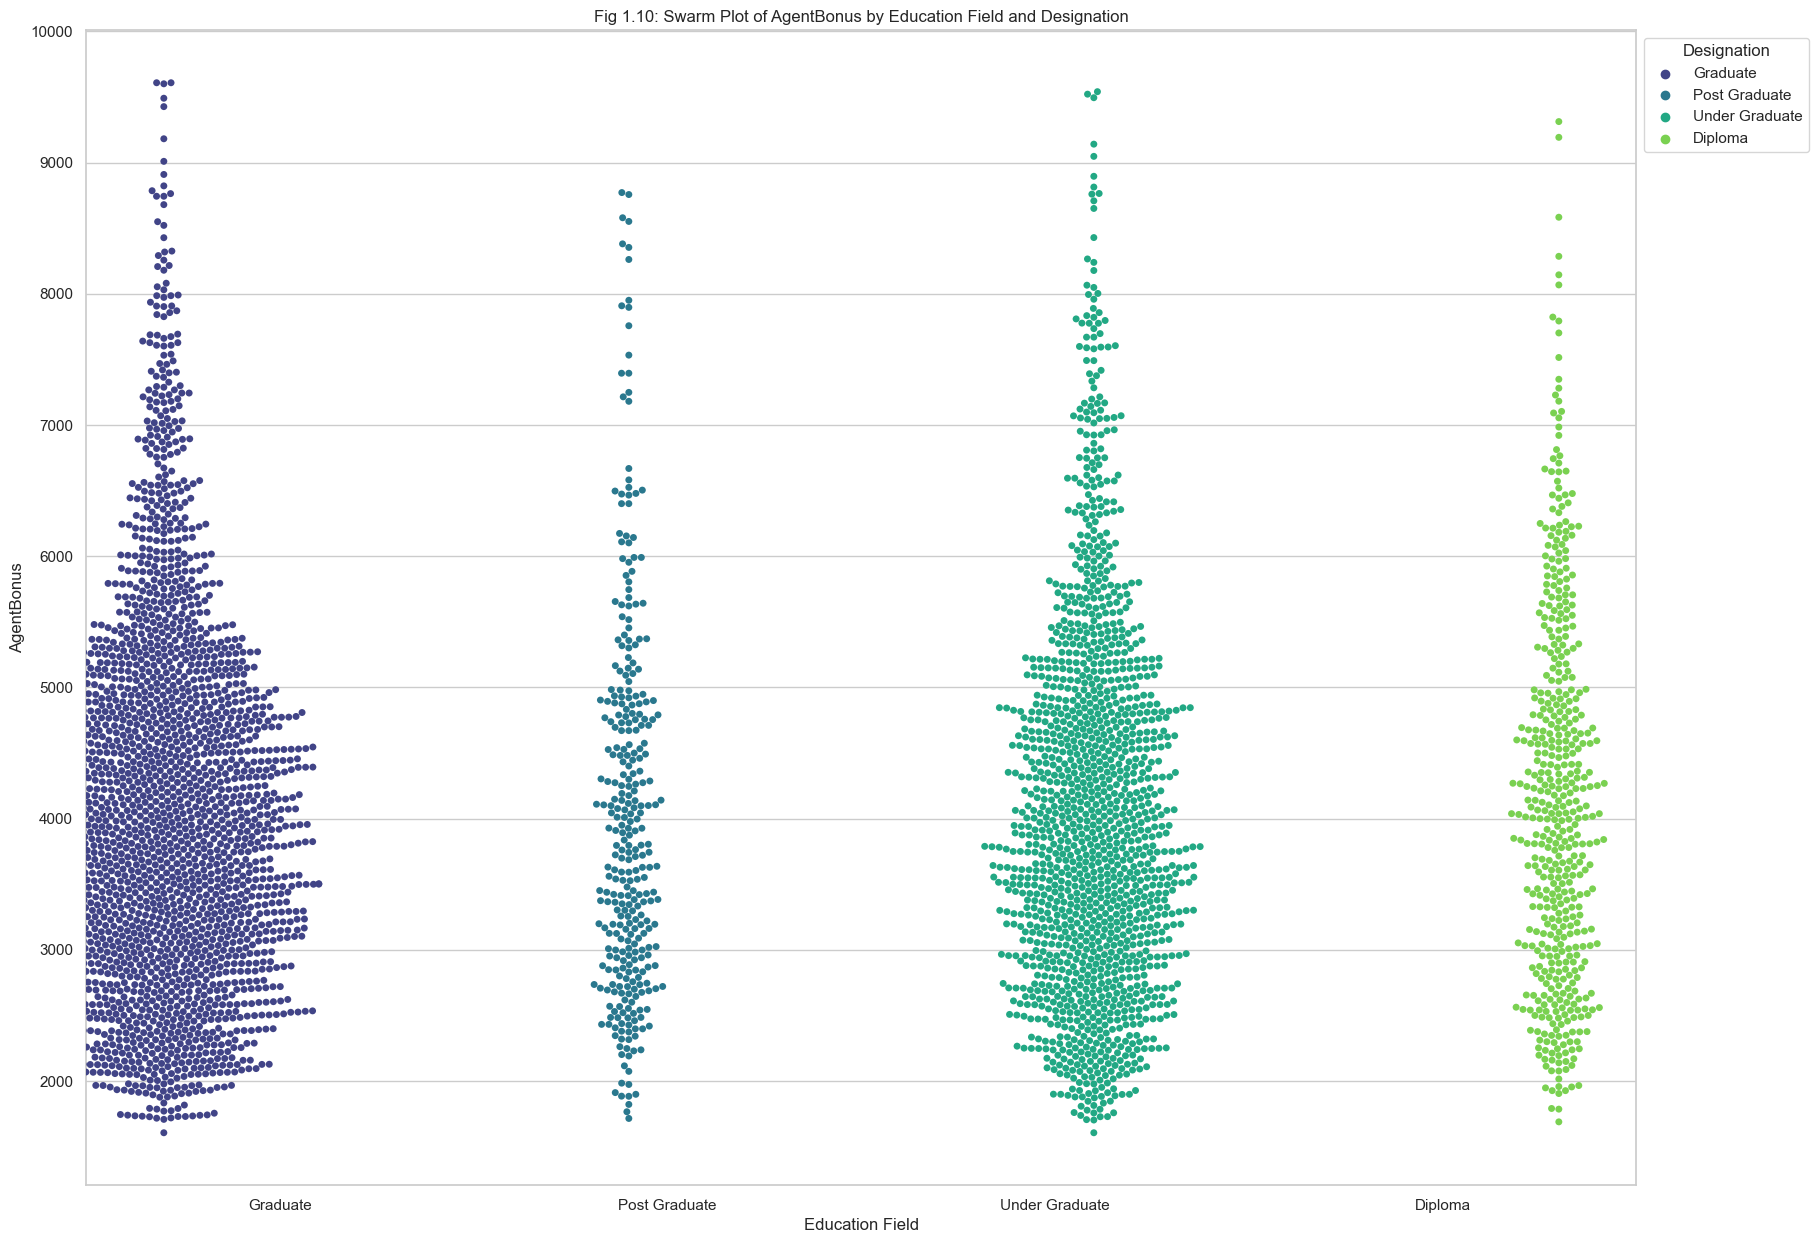

In [28]:
# Swarm Plot with Hue (e.g., 'EducationField' and 'Designation')
plt.figure(figsize=(20, 15))
sns.swarmplot(x='EducationField', y=target_variable, hue='EducationField', data=sale, palette='viridis', dodge=True)
plt.title(f'Fig 1.10: Swarm Plot of {target_variable} by Education Field and Designation')
plt.xlabel('Education Field')
plt.ylabel(target_variable)
plt.legend(title='Designation', bbox_to_anchor=(1, 1))
plt.show()

Interpretation:

The swarm plot with hue shows the distribution of 'AgentBonus' based on 'EducationField' and 'Designation'.
It helps visualize the spread of bonus amounts for different combinations of education field and designation.

C:\Users\Divya Jain\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


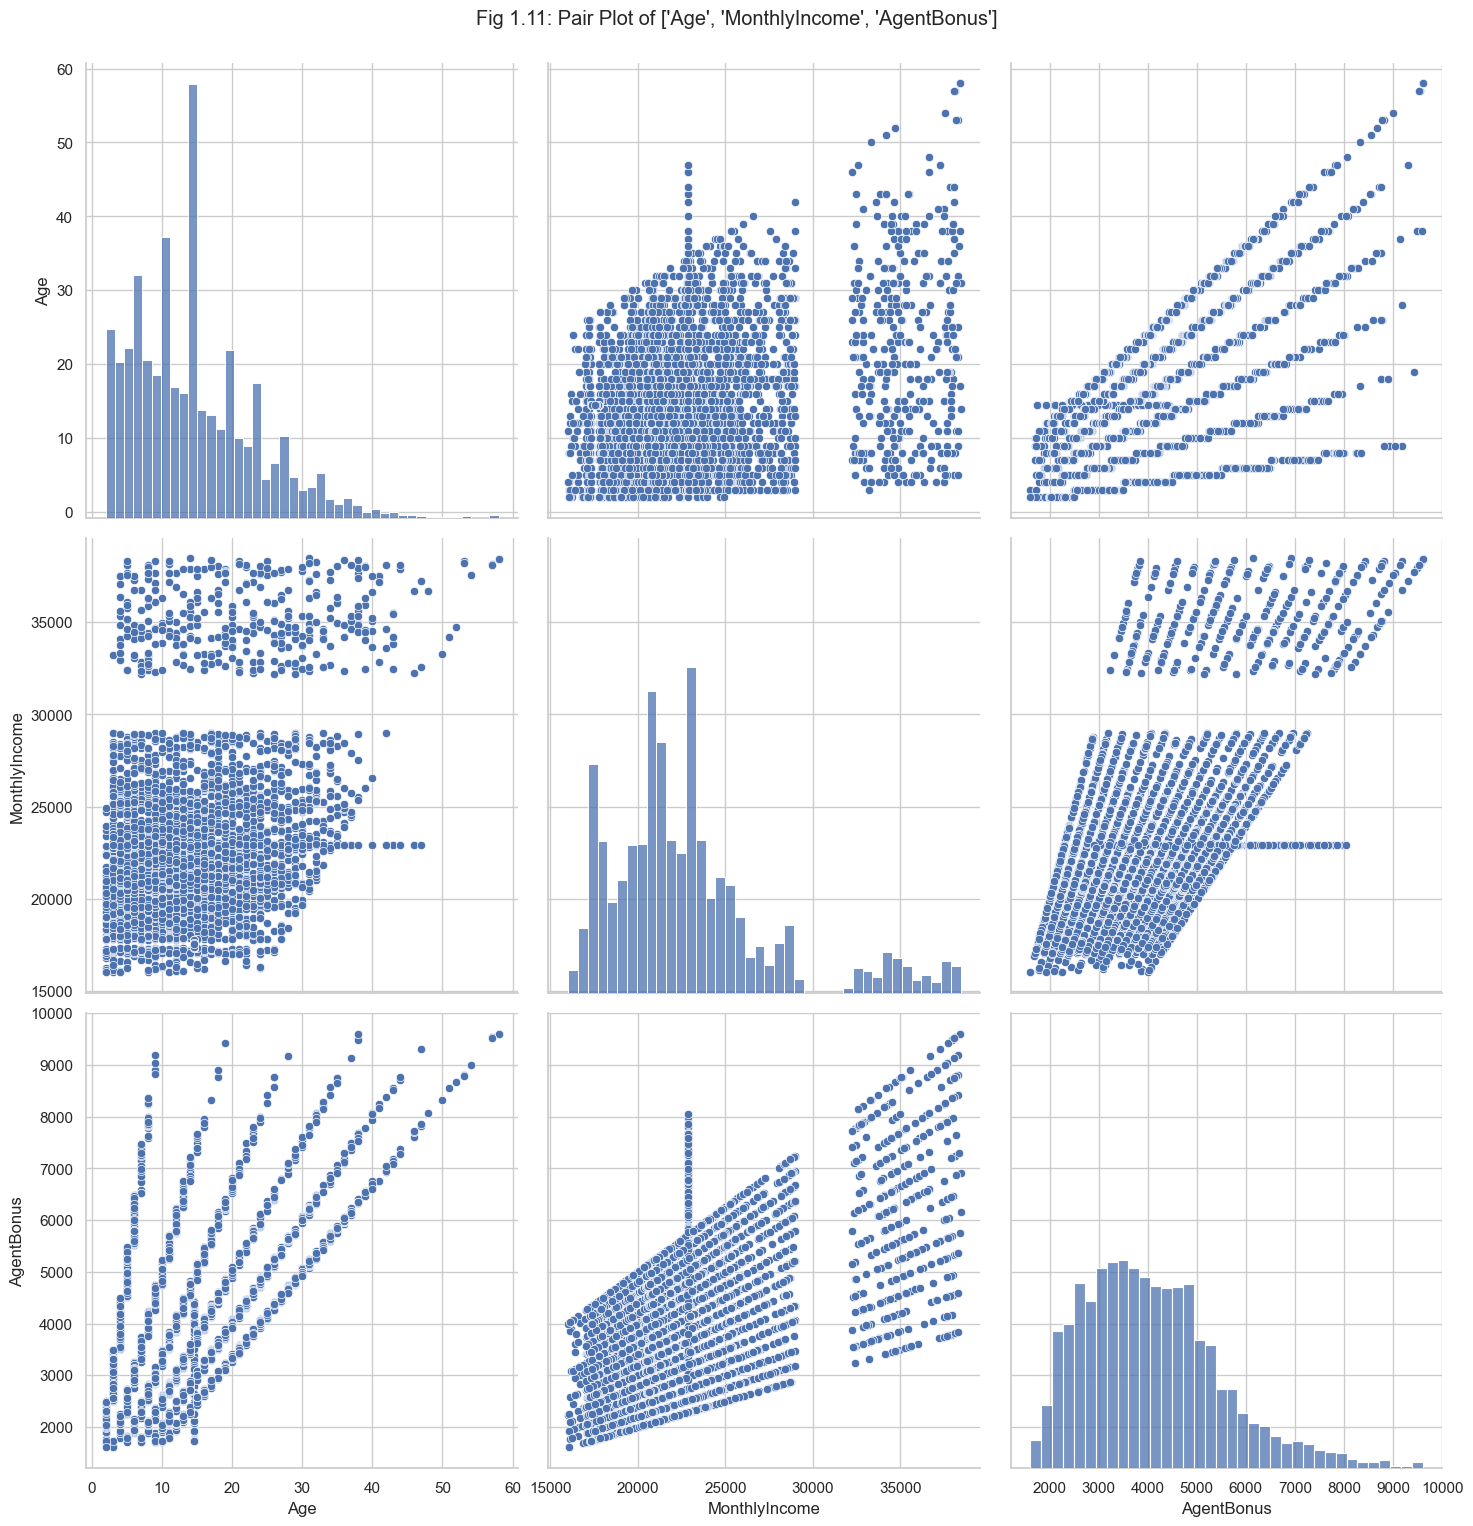

In [29]:
# Pair Plot for Numerical Variables (e.g., 'Age', 'MonthlyIncome', 'AgentBonus')
numerical_vars = ['Age', 'MonthlyIncome', target_variable]
sns.pairplot(sale[numerical_vars], height=5)
plt.suptitle(f'Fig 1.11: Pair Plot of {numerical_vars}', y=1.02)
plt.show()

Interpretation:

The pair plot shows scatter plots and histograms for numerical variables, revealing potential relationships and distributions.
Diagonal plots represent the distribution of individual variables, while off-diagonal plots show relationships between pairs of variables.

The Exploratory Data Analysis (EDA) for the target variable 'AgentBonus' reveals a diverse distribution with varying amounts. Univariate analyses show a right-skewed distribution, while bivariate and multivariate analyses uncover intriguing insights. Bonuses differ across genders, marital statuses, and education fields. Monthly income exhibits a positive correlation with bonuses. These findings provide a nuanced understanding of the 'AgentBonus' variable, aiding in future modeling and decision-making processes.

#### Module 1 Complete
_____________________________________________________________________________________________

## MODULE 2: Model building aspect

In [80]:
# Assuming you have a DataFrame called 'df' and you want to create a new 'MaritalStatusNumeric' column:
sale['MaritalStatusNumeric'] = sale['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Unmarried': 2, 'Divorced': 3})

In [82]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
print('X Train: \n',X_train)
print('\n X Test: \n',X_test)
print('\n Y Train: \n',y_train)
print('\n Y Test: \n',y_test)

X Train: 
       MonthlyIncome        Age  CustCareScore  Gender_Male  \
2115        23224.0   3.000000            3.0        False   
3359        20501.0  12.000000            1.0         True   
2025        19227.0   4.000000            5.0        False   
1580        17326.0  14.494707            1.0         True   
1426        19200.0  11.000000            4.0        False   
...             ...        ...            ...          ...   
4426        21200.0  14.000000            5.0        False   
466         20562.0  17.000000            2.0        False   
3092        19718.0  11.000000            4.0        False   
3772        21250.0  15.000000            4.0         True   
860         21651.0  17.000000            3.0         True   

      MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  
2115                  False                  True                    False  
3359                   True                 False                    False  
2025         

In [84]:
# Build Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate Linear Regression model
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

# Display Results
print("\nLinear Regression Model Results:")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R2 Score: {linear_r2:.2f}")


Linear Regression Model Results:
RMSE: 1037.57
R2 Score: 0.48


### Interpretation:

o	The average prediction error of the Linear Regression model is approximately $1037.57.

o	The R2 score of 0.48 indicates that the Linear Regression model explains 48% of the variance in 'AgentBonus.' The model is moderately effective.


In [85]:
# Build Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

# Feature Importances (if needed)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display Results
print("\nRandom Forest Model Results:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R2 Score: {rf_r2:.2f}")


Random Forest Model Results:
RMSE: 993.32
R2 Score: 0.52


### Interpretation:

o	The Random Forest model has a lower RMSE compared to the Linear Regression model, suggesting improved predictive accuracy.

o	The R2 score of 0.52 indicates that the Random Forest model explains 52% of the variance in 'AgentBonus.' It performs slightly better than the Linear Regression model.


In [86]:
# Create a stacking model
stacking_model = StackingRegressor(estimators=[('linear', linear_model), ('rf', rf_model)],
                                   final_estimator=RidgeCV())

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
stacking_predictions = stacking_model.predict(X_test)

# Evaluate Stacking model
stacking_rmse = mean_squared_error(y_test, stacking_predictions, squared=False)
stacking_r2 = r2_score(y_test, stacking_predictions)

# Display Results
print("\nStacking Model Results:")
print(f"RMSE: {stacking_rmse:.2f}")
print(f"R2 Score: {stacking_r2:.2f}")


Stacking Model Results:
RMSE: 971.51
R2 Score: 0.54


### Interpretation:

o	The Stacking model, which combines the predictions of Linear Regression and Random Forest, achieves a lower RMSE, indicating enhanced predictive performance compared to individual models.

o	The R2 score of 0.54 suggests that the Stacking model explains 54% of the variance in 'AgentBonus.' It outperforms both the Linear Regression and Random Forest models


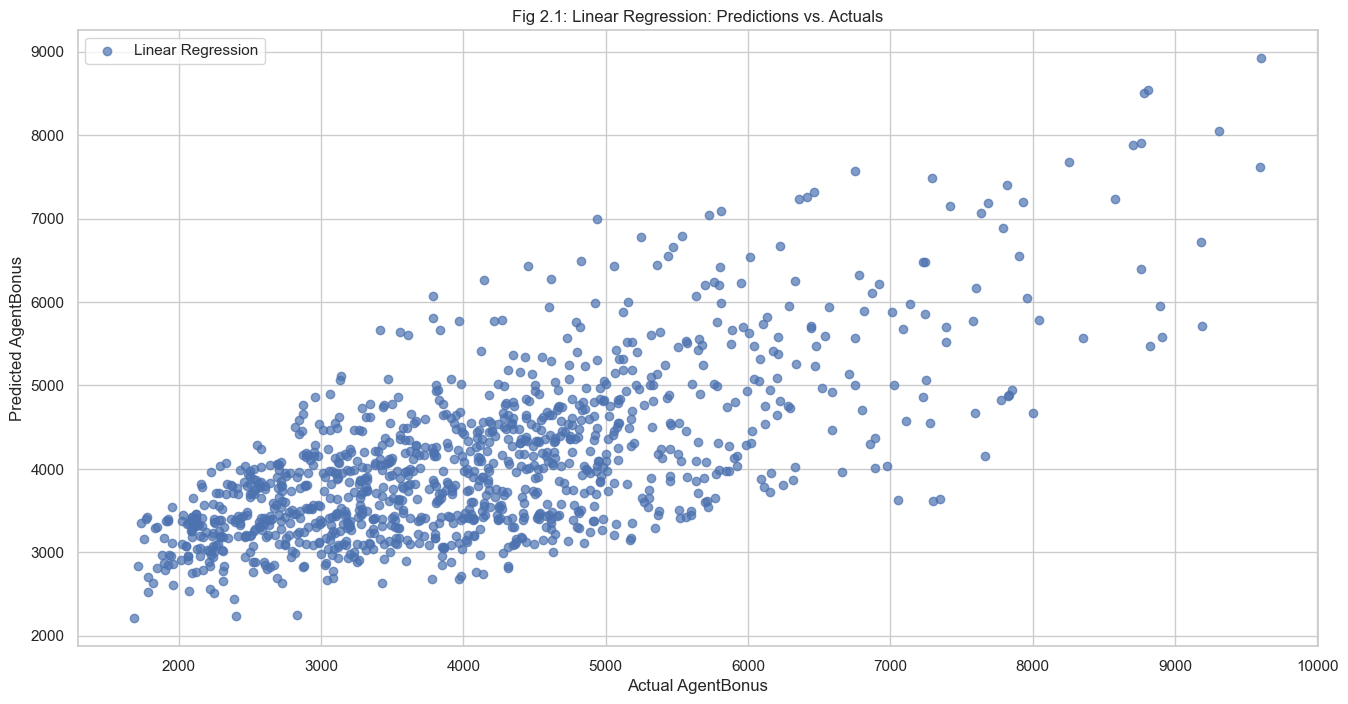

In [92]:
# Plotting predictions vs. actuals for Linear Regression
plt.figure(figsize=(16,8))
plt.scatter(y_test, linear_predictions, label='Linear Regression', alpha=0.7)
plt.xlabel('Actual AgentBonus')
plt.ylabel('Predicted AgentBonus')
plt.title('Fig 2.1: Linear Regression: Predictions vs. Actuals')
plt.legend()
plt.show()

### Interpretation:

	The scatter plot illustrates the relationship between the actual 'AgentBonus' values and the predictions made by the Linear Regression model.

	Points close to the diagonal line suggest accurate predictions, while deviations from the line indicate prediction errors.

	Examining the spread and pattern helps assess the model's overall performance.


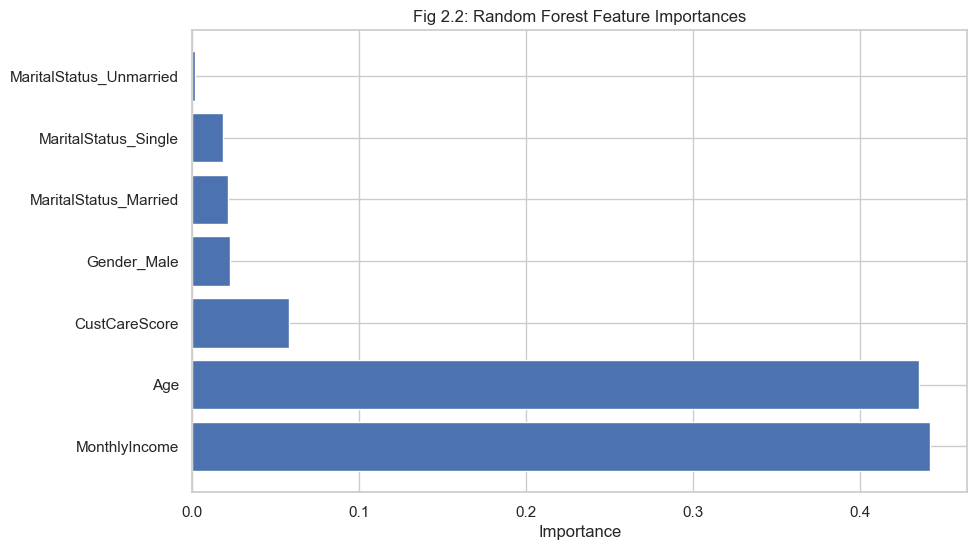

In [93]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Fig 2.2: Random Forest Feature Importances')
plt.show()

### Interpretation:

	The bar plot displays the importance of each feature in predicting 'AgentBonus' according to the Random Forest model.

	Features with higher bars contribute more to the model's predictions.

	This plot informs about the most influential factors in determining 'AgentBonus' according to the Random Forest model.


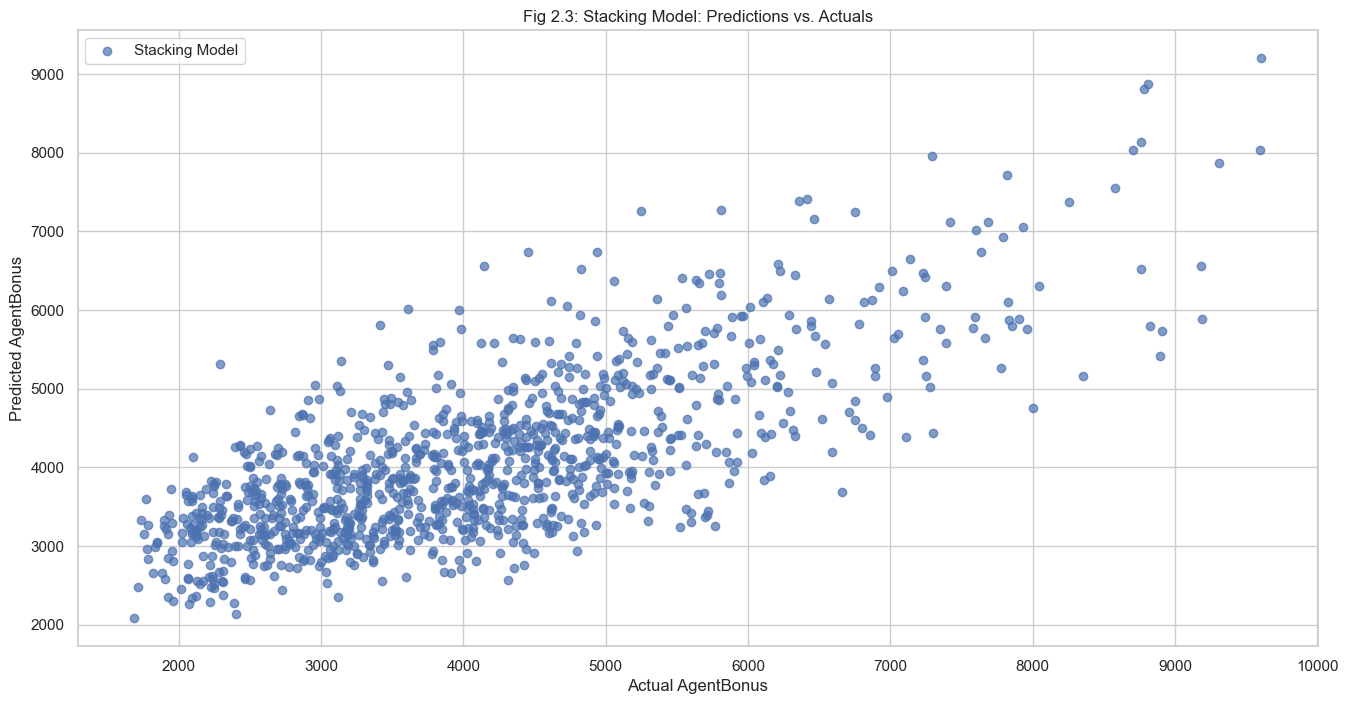

In [94]:
plt.figure(figsize=(16,8))
plt.scatter(y_test, stacking_predictions, label='Stacking Model', alpha=0.7)
plt.xlabel('Actual AgentBonus')
plt.ylabel('Predicted AgentBonus')
plt.title('Fig 2.3: Stacking Model: Predictions vs. Actuals')
plt.legend()
plt.show()

### Interpretation:

	The scatter plot compares the actual 'AgentBonus' values with the predictions made by the Stacking model.

	The tighter the cluster around the diagonal line, the more accurate the predictions.

	A well-distributed and closely clustered plot indicates the Stacking model's improved predictive accuracy compared to individual models.


### Overall Interpretation 

	Ref. Fig. 2.1, In the Linear Regression Predictions vs. Actuals plot, if points are widely scattered or deviate significantly from the line, it suggests areas where the model might need improvement.

	Ref. Fig. 2.2, In the Feature Importance Plot for Random Forest, identifying the most influential features provides actionable insights for decision-makers, enabling them to focus on critical factors.

	Ref. Fig. 2.3, The Stacking Model Predictions vs. Actuals plot, when compared to individual models, provides evidence of the ensemble model's improved predictive accuracy. The tighter grouping of points around the diagonal line indicates the effectiveness of combining diverse models.


#### Module 2 Complete
_____________________________________________________________________________________________